# Lab 3 - Part 1: Classification and Grid Search (33 marks)
### Due Date: Monday, March 13 at 12pm

Author: *Ameen Yarkhan*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The purpose of this portion of the assignment is to practice following the grid-search workflow: 
- Split data into training and test set
- Use the training portion to find the best model using grid search and cross-validation
- Retrain the best model
- Evaluate the retrained model on the test set

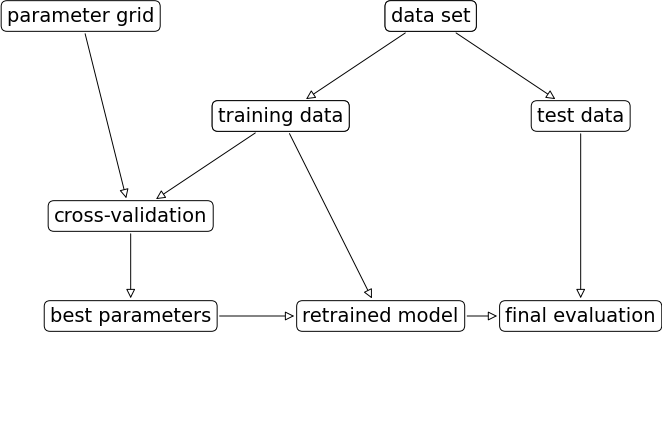

In [2]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## 0. Function definitions (2 marks)

In [3]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
     #TODO: Implement function body
    scores = cross_validate(estimator=model, X=X, y=y, scoring=scoring, cv=cv, return_train_score=True, n_jobs=-1)
    return (scores['train_score'].mean(), scores['test_score'].mean())

    
    

In [4]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
def print_grid_search_result(grid_search):
    '''Prints summary of best model from GridSearchCV object.
    
        For the best model of the grid search, print:
        - parameters 
        - cross-validation training score
        - cross-validation validation score 
        
        scores are printed with 3 decimal places
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        returns: None
        
    '''
    
    print(grid_search.best_params_)
    print("training score= {:.3f}; validation score={:.3f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_],
                                                                  grid_search.cv_results_['mean_test_score'][grid_search.best_index_]))

In [5]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [6]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title):
    '''Creates a heatmap plot of the confusion matrix.
    
        y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        labels (list(str)): Class names used for plotting (ticklabels)
        title (str): Plot title
        
        uses sklearn.metrics.confusion_matrix
        
    '''
    
    mat = confusion_matrix(y_actual, y_pred)

    sns.heatmap(mat, 
                xticklabels=labels,  
                yticklabels=labels, 
                square=True, annot=True, cbar=False, 
                fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.title(title)

## 1. Load data (2 marks)
yellowbrick mushroom  
https://www.scikit-yb.org/en/latest/api/datasets/mushroom.html




### 1.1 Prepare the feature matrix and target vector

Using the yellowbrick `load_mushroom()` function, load the mushroom data set into feature matrix `X` and target vector `y`

Print shape and type of `X`, `y`

In [7]:
# TODO: Add data loading code
from yellowbrick import datasets
from sklearn.model_selection import train_test_split 

X,y = datasets.load_mushroom()



print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')



Shape of X: (8123, 3)
Shape of y: (8123,)


## 2. Preprocessing (4 marks)
In this dataset, all features are discrete and nominal and need to be encoded. We will use a `OneHotEncoder`

The target vector is discrete and nominal as well and contains string labels. While sklearn is OK using string labels in target vectors, you will use a `LabelEncoder` explicitly to convert strings to integers and keep the encoder to translate between the two representations

### 2.1 Onehot encoding of features
Use `OneHotEncoder` to convert `X` into one-hot-encoded features stored in a variable `X_enc`. Use `sparse=False`. Print shape of `X_enc`

In [8]:
# TODO: Add OneHotEncoder here
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

onehot = OneHotEncoder()
X_enc = onehot.fit_transform(X)

print(f'Shape of X_enc: {X_enc.shape}')



Shape of X_enc: (8123, 20)


### 2.2 Label encode target vector 
Use `LabelEncoder` to encode the target vector `y`, saved in a variable `y_enc`

Print the resulting target vector `y_enc` and print the class names available in the `classes_` attribute of the `LabelEncoder` object

In [9]:
# TODO: Add LabelEncoder here
labelencoder= LabelEncoder()
y_enc = labelencoder.fit_transform(y)

print(y_enc)
print(f'Shape of y_enc / target vector: {y_enc.shape}')
print(f'Class labels in target vector: {labelencoder.classes_}')


[0 0 1 ... 0 1 0]
Shape of y_enc / target vector: (8123,)
Class labels in target vector: ['edible' 'poisonous']


## 3. Create training and test sets (1 mark)
Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X_enc` and `y_enc` into training and test sets

In [10]:
# TODO: Add train_test_split() here
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, random_state=37, test_size=0.2)

print(f'Shape of X_train_enc: {X_train_enc.shape}')
print(f'Shape of X_test_enc: {X_test_enc.shape}')
print(f'Shape of y_train_enc: {y_train_enc.shape}')
print(f'Shape of y_test_enc: {y_test_enc.shape}')


Shape of X_train_enc: (6498, 20)
Shape of X_test_enc: (1625, 20)
Shape of y_train_enc: (6498,)
Shape of y_test_enc: (1625,)


## 4. Compare models using cross-validation (4 marks)
Create a list containing `LogisticRegression()`, 
          `SVC()`,
          `BernoulliNB()`,
        `RandomForestClassifier(random_state=55)`, 
         `GradientBoostingClassifier(random_state=56)` objects.

Iterate this list, then:
- Compute the **f1 score** using `get_classifier_cv_score()` with the 7-fold cross-validation defined above with `X_train` and `y_train` as arguments
- Print the models' training and validation scores with **3 decimal places**

In [11]:
# TODO: Add cross-validation comparison here

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

my_list = [LogisticRegression(), SVC(), BernoulliNB(), RandomForestClassifier(random_state=55),GradientBoostingClassifier(random_state=56)]


for model in my_list:
    print(model)
    trainscore,testscore = get_classifier_cv_score(model, X_train_enc, y_train_enc)

    print(f'Train score: {trainscore:.3f}')
    print(f'Validation score: {testscore:.3f}')
    print('\n')

LogisticRegression()
Train score: 0.667
Validation score: 0.667


SVC()
Train score: 0.720
Validation score: 0.708


BernoulliNB()
Train score: 0.627
Validation score: 0.626


RandomForestClassifier(random_state=55)
Train score: 0.720
Validation score: 0.707


GradientBoostingClassifier(random_state=56)
Train score: 0.711
Validation score: 0.701




## 5. Hyperparameter tuning using grid search (8 marks)

The inital cross-validation above gives us an idea of how algorithms perfom using their default hyperparameters

Next, we will try and improve one model by tuning its hyperparameters using grid search

### 5.1 Grid search for RandomForestClassifier 

Perform grid search using `GridSearchCV` for the `RandomForestClassifier(n_estimators=300, random_state=55)`:

- Set the number of trees `n_estimators=300` for all evaluations
- Grid search using 7-fold cross-validation and `f1` as the scoring function 
- Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores  or -1 works well

Use the following hyperparameters and values:
- `'max_depth': [3, 5, 8]`
- `'max_features': [0.3, 0.5, 0.7, 0.9]`

From sklearn help:
> - max_depth: The maximum depth of the tree
> - max_features: If float, then max_features is a fraction and max(1, int(max_features * n_features)) features are considered at each split


Use the `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results

In [12]:
# TODO: Setup grid search for RandomForestClassifier(random_state=55)
from sklearn.model_selection import GridSearchCV

pgrid = {'max_depth':[3,5,8],
         'max_features':[0.3,0.5,0.7,0.9]}
gridsearch = GridSearchCV(estimator=RandomForestClassifier(n_estimators=300, random_state=55), param_grid=pgrid,cv=7, n_jobs=-1, return_train_score=True,scoring='f1')




In [13]:
# TODO: Perform the grid search by calling fit() with X_train and y_train
gridsearch.fit(X_train_enc,y_train_enc)

GridSearchCV(cv=7,
             estimator=RandomForestClassifier(n_estimators=300,
                                              random_state=55),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8],
                         'max_features': [0.3, 0.5, 0.7, 0.9]},
             return_train_score=True, scoring='f1')

In [14]:
# TODO: Call print_grid_search_result() to print the results
print_grid_search_result(gridsearch)

{'max_depth': 5, 'max_features': 0.7}
training score= 0.719; validation score=0.716


### *Question 1:* What is the validation score of the best model? Which models in Section 4 does it outperform?

`The best model is the RandomForestClassifier with with max_depth=5 and max_features=0.7. It gave us a validation score of 0.716 which is the highest compared to the other four. From the models in section 4, this outperforms all of them, including the RandomForestClassifier with default parameters.`


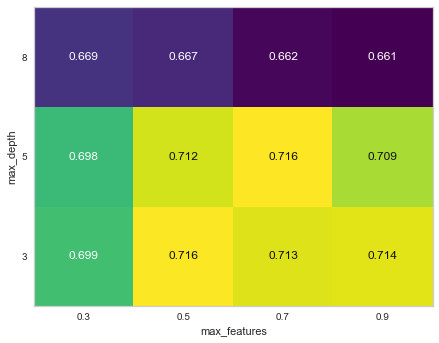

In [15]:
# TODO: Call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations
plot_grid_search_results(gridsearch)

### *Question 2:* Where in the hyperparameter ranges does the maximum occur? Would you need to adjust the hyperparameter ranges to find a better model?

`The maximum occurs at max_depth=5 and max_features=0.7, also when max_depth=3 and max_features=0.5. I would not need to adjust the hyperparameter ranges to find a better model.`


## 6. Re-train best model (2 marks)
Re-train the best `RandomForestClassifier()` from the grid search above on the training dataset `X_train` and `y_train`

In [16]:
#TDOD: Re-train best random forest classifier
bestRandomForest = gridsearch.best_estimator_

bestRandomForest.fit(X_train_enc,y_train_enc)

RandomForestClassifier(max_depth=5, max_features=0.7, n_estimators=300,
                       random_state=55)

## 7. Evaluate using test data (4 marks)

Using the retrained model and the test dataset `X_test` and `y_test`:
- plot the confusion matrix using the `plot_confusion_matrix()` function defined above
- print the classification report

Make sure the plot has class labels and a title

### 7.1 Confusion matrix and classification report

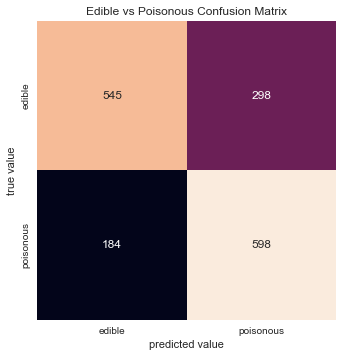

In [17]:
#TODO: call plot_confusion_matrix(), use LabelEncoder classes_ to get labels
from sklearn.metrics import classification_report

y_pred = bestRandomForest.predict(X_test_enc)


plot_confusion_matrix(y_test_enc,y_pred,labelencoder.classes_, title='Edible vs Poisonous Confusion Matrix')

### 7.2 Classification report

In [18]:
#TODO: print classification report using default threshold
print(classification_report(y_test_enc,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       843
           1       0.67      0.76      0.71       782

    accuracy                           0.70      1625
   macro avg       0.71      0.71      0.70      1625
weighted avg       0.71      0.70      0.70      1625



### *Question 3:* What are the precision, recall and accuracy for the positive class on the test set?

Precision 0.67
Recall 0.76
Accuracy 0.71

### *Question 4:* How many false negatives and false positives does the model produce on the test set?

298 false positives, 184 false negatives


## 8. Conclusion (4 marks)

In the conclusion, comment on the following items and use data to support your findings:
1. In the classification of edible vs poisonous mushrooms, what do false positive and false negative predictions imply and what are the consequences of making these mistakes?
1. In the classification of edible vs poisonous mushrooms, why is high recall desired?
1. Reflect on the usefulness of this model if it would be put into production and propose ways to improve the model and/or application

*YOUR ANSWER HERE*

1.  False positive wrongly indicates poisonous when it should be edible. This would cause food waste. False negative indictes edible when actually poisonous, this could cause serious harm to somebody eating it.

2. High recall would mean number of false negatives is low and there is a high number of true positives. As explained in the previous point, we do not want false negatives.

3. It would be useful to growers and perhaps if it was integrated into some tool so you could determine if a mushroom in the wild is edible. The model could be improved if fed more data/features to determine if a mushroom is edible or poisonous.




## 9. Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment 

Can include thoughts from Lab 3-2 as well

*ADD YOUR THOUGHTS HERE*



I liked how useful getting insights from the predictions can be in determining results. It shows that you shouldn't blindly accept what a model spits out.

I found it motivating to use these tools in my own projects in the future!